<a href="https://colab.research.google.com/github/hjangir080/CNN_CIFAR10/blob/main/neural.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(x_train, y_train), (x_test,y_test) = datasets.cifar10.load_data()

In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
x_test.shape

(10000, 32, 32, 3)

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
y_test.shape

(10000, 1)

In [ ]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [ ]:
#reshape to flatten the 2d array into 1d
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
#repeat for test also
y_test = y_test.reshape(-1,)

In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

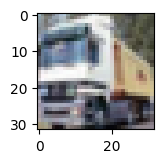

In [ ]:
plt.figure(figsize=(1.5,2))
plt.imshow(x_train[1])

In [ ]:
#bcz we flattened out the array and thus can access each category using y[index]
def plot_sample(x, y, index):
    plt.figure(figsize = (1.5,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

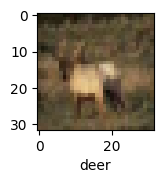

In [ ]:
plot_sample(x_train, y_train, 3)

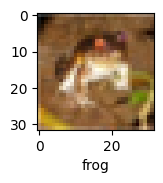

In [ ]:
plot_sample(x_train, y_train, 0)

In [ ]:
#normalize data as rgb values are in the range of 255
x_train = x_train / 255.0
x_test = x_test / 255.0

In [ ]:
#create the nn with relu and softmax
ann1 = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),#make image into a 1d array
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='sigmoid')
    ])

ann1.compile(optimizer='SGD',#stochastic gradient descent
              loss='sparse_categorical_crossentropy',#use this as y is only a value and not array with 1 hot encoding, if it was wouldve used only categorical_crossentropy
              metrics=['accuracy'])

ann1.fit(x_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 14s 8ms/step - loss: 1.8124 - accuracy: 0.3543
Epoch 2/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.6230 - accuracy: 0.4258
Epoch 3/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.5383 - accuracy: 0.4569
Epoch 4/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.4764 - accuracy: 0.4820
Epoch 5/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.4285 - accuracy: 0.4978
Epoch 6/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.3820 - accuracy: 0.5149
Epoch 7/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.3447 - accuracy: 0.5287
Epoch 8/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.3104 - accuracy: 0.5400
Epoch 9/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.2788 - accuracy: 0.5501
Epoch 10/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred1 = ann1.predict(x_test)
y_pred_classes1 = [np.argmax(element) for element in y_pred1]

print("Classification Report: \n", classification_report(y_test, y_pred_classes1))

313/313 [==============================] - 1s 2ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.58      0.61      0.59      1000
           1       0.67      0.63      0.65      1000
           2       0.40      0.37      0.39      1000
           3       0.36      0.32      0.34      1000
           4       0.64      0.21      0.31      1000
           5       0.46      0.40      0.43      1000
           6       0.41      0.81      0.54      1000
           7       0.55      0.62      0.59      1000
           8       0.66      0.62      0.64      1000
           9       0.62      0.58      0.60      1000

    accuracy                           0.52     10000
   macro avg       0.54      0.52      0.51     10000
weighted avg       0.54      0.52      0.51     10000



In [ ]:
ann1.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.3596 - accuracy: 0.5176


[1.359634518623352, 0.5175999999046326]

In [ ]:
#create the nn with relu and softmax
ann2 = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),#make image into a 1d array
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')  #works better than sigmoid as it normalizes
    ])

ann2.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',#use this as y is only a value and not array with 1 hot encoding, if it was wouldve used only categorical_crossentropy
              metrics=['accuracy'])

ann2.fit(x_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.8153 - accuracy: 0.3532
Epoch 2/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.6249 - accuracy: 0.4250
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5429 - accuracy: 0.4534
Epoch 4/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.4844 - accuracy: 0.4768
Epoch 5/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.4318 - accuracy: 0.4970
Epoch 6/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.3883 - accuracy: 0.5125
Epoch 7/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.3507 - accuracy: 0.5252
Epoch 8/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.3143 - accuracy: 0.5388
Epoch 9/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.2841 - accuracy: 0.5496
Epoch 10/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.253

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred2 = ann2.predict(x_test)
y_pred_classes2 = [np.argmax(element) for element in y_pred2]

print("Classification Report: \n", classification_report(y_test, y_pred_classes2))

313/313 [==============================] - 1s 2ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.50      0.69      0.58      1000
           1       0.76      0.47      0.58      1000
           2       0.46      0.32      0.37      1000
           3       0.40      0.24      0.30      1000
           4       0.41      0.53      0.46      1000
           5       0.50      0.34      0.41      1000
           6       0.62      0.51      0.56      1000
           7       0.44      0.74      0.56      1000
           8       0.64      0.61      0.63      1000
           9       0.52      0.68      0.59      1000

    accuracy                           0.51     10000
   macro avg       0.53      0.51      0.50     10000
weighted avg       0.53      0.51      0.50     10000



In [ ]:
ann2.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.3694 - accuracy: 0.5125


[1.3694318532943726, 0.512499988079071]

now although the ann work average, with pictures it is better to use cnn instead

In [ ]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),#detects 32 diff features with 3,3 size
    layers.MaxPooling2D((2, 2)),#Captures the most prominent features and reduces the dimensionality.

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),#another layer of convolution
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [ ]:
cnn.compile(optimizer='adam',#Adaptive Moment Estimation, it changes learning rate as required
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
cnn.fit(x_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.5068 - accuracy: 0.4584
Epoch 2/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.1529 - accuracy: 0.5935
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0223 - accuracy: 0.6413
Epoch 4/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9405 - accuracy: 0.6742
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8797 - accuracy: 0.6923
Epoch 6/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8302 - accuracy: 0.7113
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7850 - accuracy: 0.7274
Epoch 8/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7433 - accuracy: 0.7404
Epoch 9/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7098 - accuracy: 0.7531
Epoch 10/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.677

In [ ]:
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.9015 - accuracy: 0.6965


[0.9015322327613831, 0.6965000033378601]

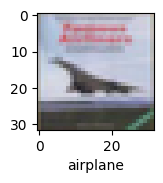

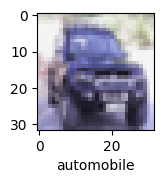

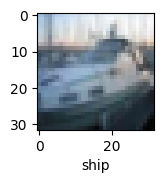

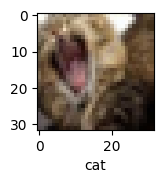

In [ ]:
plot_sample(x_test, y_test,3)
plot_sample(x_test, y_test,9)
plot_sample(x_test, y_test,2)
plot_sample(x_test, y_test,53)

In [ ]:
y_pred = cnn.predict(x_test)
y_pred[:5]

313/313 [==============================] - 1s 2ms/step


array([[1.3213341e-04, 1.4906043e-04, 1.9894607e-04, 8.6754942e-01,
        1.6089855e-03, 3.9620958e-02, 2.8848124e-03, 5.5894166e-06,
        8.7633573e-02, 2.1649915e-04],
       [5.2918709e-04, 3.8146588e-04, 1.4802475e-07, 1.2700180e-07,
        4.5035580e-07, 1.3396057e-08, 4.4781334e-08, 3.2207061e-09,
        9.9744922e-01, 1.6393944e-03],
       [3.4450088e-02, 7.6359659e-02, 1.3635490e-03, 8.8286754e-03,
        1.3331989e-03, 1.2216434e-03, 3.3589751e-03, 1.9446587e-03,
        7.9917747e-01, 7.1962059e-02],
       [8.2236159e-01, 1.7378904e-02, 3.3768065e-02, 4.9913772e-03,
        3.0277845e-02, 1.4677042e-05, 5.0459532e-03, 4.9288756e-05,
        8.5894480e-02, 2.1775630e-04],
       [2.4340693e-06, 1.6568521e-05, 4.7258153e-03, 1.5055780e-01,
        9.2281878e-02, 6.3943933e-03, 7.4594170e-01, 2.4818721e-07,
        7.8765879e-05, 3.4653428e-07]], dtype=float32)

In [ ]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [ ]:
print("Classification Report: \n", classification_report(y_test, y_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.76      0.71      0.74      1000
           1       0.80      0.83      0.81      1000
           2       0.64      0.55      0.59      1000
           3       0.50      0.49      0.49      1000
           4       0.66      0.62      0.64      1000
           5       0.53      0.71      0.61      1000
           6       0.75      0.79      0.77      1000
           7       0.82      0.67      0.74      1000
           8       0.80      0.79      0.80      1000
           9       0.77      0.79      0.78      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.70     10000
weighted avg       0.70      0.70      0.70     10000



right predictions

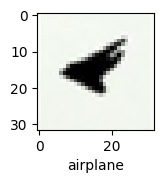

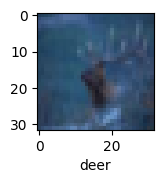

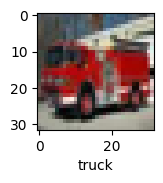

In [ ]:
plot_sample(x_test, y_test,21)
plot_sample(x_test, y_test,22)
plot_sample(x_test, y_test,23)

In [ ]:
print(classes[y_classes[21]])
print(classes[y_classes[22]])
print(classes[y_classes[23]])

airplane
deer
truck


wrong predictions

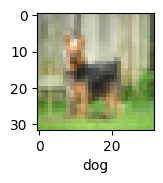

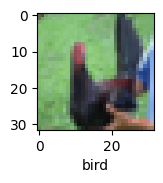

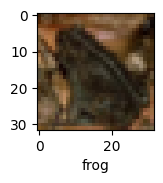

In [ ]:
plot_sample(x_test, y_test,24)
plot_sample(x_test, y_test,25)
plot_sample(x_test, y_test,30)

In [ ]:
print(classes[y_classes[24]])
print(classes[y_classes[25]])
print(classes[y_classes[30]])

deer
cat
cat
